Using Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [3]:
import pandas as pd
filepath = ("/content/drive/MyDrive/Notebooks/Data Analytics/fcc-forum-pageviews.csv")

df = pd.read_csv(filepath,
                parse_dates = ['date'],
                index_col = "date")

In [4]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Cleaning the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [5]:
df = df.loc[
        (df["value"] >= df["value"].quantile(0.025)) &
        (df["value"] <= df["value"].quantile(0.975))
]

Creating a draw_line_plot function that uses Matplotlib to draw a line chartfor  the Forum Page Views during 5/2016-12/2019. The label on the x axis will be Date and the label on the y axis will be Page Views.

Text(0, 0.5, 'Views')

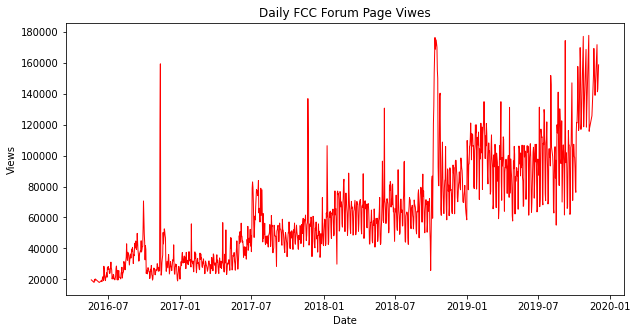

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df.index, df['value'],'r', linewidth=1)

ax.set_title('Daily FCC Forum Page Viwes')
ax.set_xlabel('Date')
ax.set_ylabel('Views')

Creating a draw_bar_plot function that draws a bar chart which will show the average daily page views for each month grouped by year. The legend will show month labels and have a title of Months. On the chart, the label on the x axis will be Years and the label on the y axis will be Average Page Views.

In [37]:
df['month'] = df.index.month
df['year'] = df.index.year

df_bar = df.groupby(['year','month'])['value'].mean()
#df_bar.stack()
print(df_bar)

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]), <a list of 9 Text major ticklabel objects>)

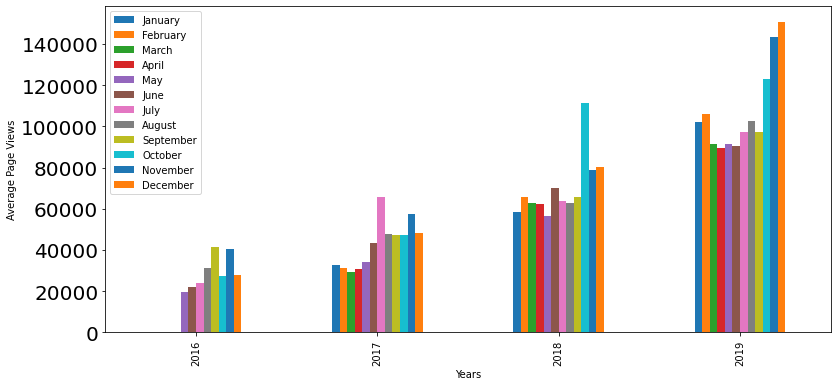

In [41]:
fig = df_bar.unstack().plot.bar(
                      legend = True,
                      figsize=(13,6),
                      ylabel='Average Page Views',
                      xlabel='Years'
                      ).figure

plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)

Creating a draw_box_plot function that uses Seaborn to draw two
adjacent box plots where the box plots will show how the values are distributed within a given year or month and how it compares over time. The title of the first chart will be Year-wise Box Plot (Trend) and the title of the second chart will be Month-wise Box Plot (Seasonality). 

I shoudl make sure that the month labels on bottom start at Jan and the x and y axis are labeled correctly. 

In [26]:
print(df['month'].unique())

[ 5  6  7  8  9 10 11 12  1  2  3  4]


In [42]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [43]:
df_box.head()

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


In [44]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

df_box.head()

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
937,2019-01-06,94108,Jan,2019,1
936,2019-01-05,77897,Jan,2019,1
935,2019-01-04,94514,Jan,2019,1
934,2019-01-03,100710,Jan,2019,1


Text(0, 0.5, 'Page Views')

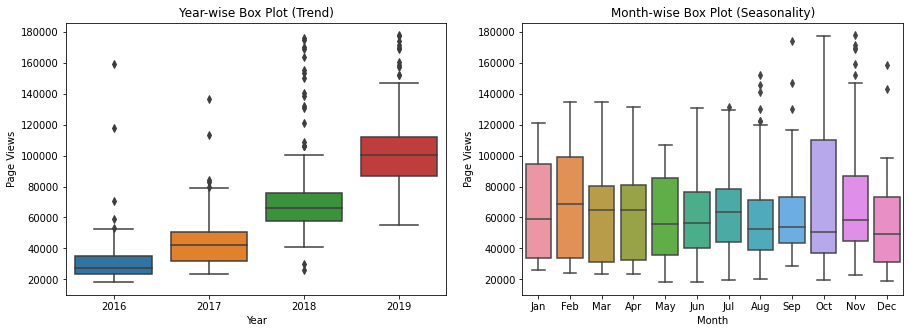

In [47]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1,
                         ncols = 2,
                         figsize = (15,5)
                         )
axes[0] = sns.boxplot(x = df_box['year'],
                      y = df_box['value'],
                      ax = axes[0]
                      )

axes[1] = sns.boxplot(x = df_box['month'],
                      y = df_box['value'],
                      ax = axes[1]
                      )

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')